### Comparison with vectorized and original functions
#### Edited by Erich Zimmer
#### Created at 20210817, 2109 CTZ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openpiv.pyprocess import find_first_peak,\
    vectorized_correlation_to_displacements
from openpiv.tools import imread
from numpy import log
from glob import glob

### Vectorized solution for subpixel estimation

In [2]:
N = 64

corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
corr[3,5] = 1
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
pos,height = find_first_peak(corr)

In [4]:
pos,height

((3, 4), 3.0)

In [5]:
from openpiv.pyprocess import find_subpixel_peak_position

In [6]:
find_subpixel_peak_position(corr) 

(3.0, 3.769577293545741)

In [7]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 0 bad peak(s)


array([[3.        ],
       [3.76957734]])

## let's find some corner cases

In [8]:
# peak on the border 
corr = np.zeros((N,N))

corr[:3,:3] = 1
corr[0,0] = 2
corr[0,2] = 3
corr[0,3] = 1
corr

array([[2., 1., 3., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Corner case 1: peak on the border

it is disregarded in our function because we cannot define well the subpixel
position. Or do we? 

In [9]:
find_subpixel_peak_position(corr)

(nan, nan)

In [10]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 1 bad peak(s)


array([[nan, nan]])

In [11]:
# peak on the border 
corr = np.flipud(corr)
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [2., 1., 3., ..., 0., 0., 0.]])

In [12]:
find_subpixel_peak_position(corr)

(nan, nan)

In [13]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 1 bad peak(s)


array([[nan, nan]])

In [14]:
corr = np.fliplr(corr)
corr[-2,-1]=5
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 5.],
       [0., 0., 0., ..., 3., 1., 2.]])

In [15]:
find_subpixel_peak_position(corr)

(nan, nan)

In [16]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 1 bad peak(s)


array([[nan, nan]])

In [17]:
## Corner case 2: negative value next to peak - the log(n<0) fails

In [18]:
corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
# corr[3,5] = 1
corr -= 0.5
corr

array([[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5,  0.5, ..., -0.5, -0.5, -0.5],
       ...,
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
       [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]])

In [19]:
find_subpixel_peak_position(corr) # automatically uses parabolic method

(3.0, 3.75)

In [20]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 0 bad peak(s)
Found 1 negative correlation indices resulting in NaNs
Fallback for negative indices is a 3 point parabolic curve method


/home/user/Documents/repos/openpiv-python/openpiv/pyprocess.py:1201: RuntimeWarning: invalid value encountered in log
  nom2 = log(cd) - log(cu)
/home/user/Documents/repos/openpiv-python/openpiv/pyprocess.py:1202: RuntimeWarning: invalid value encountered in log
  den2 = 2 * log(cd) - 4 * log(c) + 2 * log(cu)


array([[3.        ],
       [3.74999997]])

In [21]:
## Corner case 3: zero next to the peak - the log(0) fails

In [22]:
corr = np.zeros((N,N))

corr[2:5,2:5] = 1
corr[3,3] = 2
corr[3,4] = 3
# corr[3,5] = 1
corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
find_subpixel_peak_position(corr)

(3.0, 3.5230088020336483)

In [24]:
np.flip(vectorized_correlation_to_displacements(corr[np.newaxis, :, :]) + np.floor(corr.shape[0] / 2))

Found 0 bad peak(s)


array([[3.        ],
       [3.52395087]])

In [25]:
eps = 1e-7
for method in ['gaussian','parabolic','centroid']:
    i,j = find_subpixel_peak_position(corr,method)
    print(i,j)
    i,j = find_subpixel_peak_position(corr+eps,method)
    print(i,j)


3.0 3.5239508804084627
3.0 3.5249733967346586
3.0 3.75
3.0 3.75
3.0 3.600000095999977
2.9999999999999996 3.600000143999948


In [26]:
for method in ['gaussian','parabolic','centroid']:
    j, i = vectorized_correlation_to_displacements(corr[np.newaxis, :, :], subpixel_method = method) + np.floor(corr.shape[0] / 2)
    print(i, j)

Found 0 bad peak(s)
[3.] [3.52532142]
Found 0 bad peak(s)
[3.] [3.75]
Found 0 bad peak(s)
[3.] [3.60000014]


### Speed increase demonstration

In [27]:
import pylab

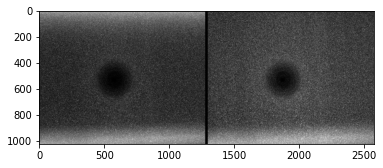

In [28]:
frame_a = imread('../test11/A001_1.tif')
frame_b = imread('../test11/A001_2.tif')
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],
             cmap=pylab.cm.gray)

In [29]:
window_size = 32
overlap = 16
from openpiv.pyprocess import moving_window_array, get_field_shape,\
    get_coordinates, fft_correlate_images, correlation_to_displacement

n_rows, n_cols = get_field_shape(
            frame_a.shape, 
            window_size, 
            overlap
        )
x, y = get_coordinates(frame_a.shape, window_size, overlap)

aa = moving_window_array(
            frame_a, 
            window_size, 
            overlap
)

bb = moving_window_array(
            frame_b, 
            window_size,
            overlap
)
corr = fft_correlate_images(
            aa, bb,
            correlation_method='circular',
            normalized_correlation = True
)

In [30]:
from openpiv.pyprocess import find_all_first_peaks, find_all_second_peaks, find_second_peak
peaks_v = find_all_second_peaks(corr)[0]
peaks_o = []
for i in range(len(corr)):
    (k, m), _ = find_second_peak(corr[i,:,:])
    peaks_o.append([i, k, m])
print(['original', 'vectorized'])
for i in range(len(peaks_v)):
    #print(peaks_o[i], peaks_v[i])
    if peaks_v[i][1] != peaks_o[i][1] or peaks_v[i][2] != peaks_o[i][2]:
        print(False)

['original', 'vectorized']


In [31]:
%%time
u_o, v_o = correlation_to_displacement(
            corr, 
            n_rows,
            n_cols,
            subpixel_method='gaussian'
        )

CPU times: user 209 ms, sys: 1.15 ms, total: 210 ms
Wall time: 207 ms


In [32]:
%%time
u_v, v_v = vectorized_correlation_to_displacements(
    corr,
    n_rows,
    n_cols,
    subpixel_method='gaussian',
    #eps = 1e-7
)

Found 7 bad peak(s)
CPU times: user 9.43 ms, sys: 5.1 ms, total: 14.5 ms
Wall time: 12.8 ms


In [33]:
# slight descrepancies possibly caused by setting eps to 1e-10
print('[u original, u vectorized]')
print(np.stack((u_o[0, 0:12], u_v[0, 0:12])).T)
print((np.nanmean(u_o), np.nanmean(u_v)))

[u original, u vectorized]
[[-2.36462169 -2.36462164]
 [-2.42157302 -2.42157295]
 [-2.77813509 -2.77813515]
 [-2.9613403  -2.96134032]
 [-2.84248632 -2.84248634]
 [-2.90768449 -2.90768454]
 [-2.90936755 -2.90936758]
 [-2.97392535 -2.97392533]
 [-2.99476205 -2.99476203]
 [-3.01880582 -3.01880579]
 [-3.02868448 -3.02868447]
 [-2.98723135 -2.98723136]]
(-0.9060849665516473, -0.9060849666233461)


### Vectorized solution for signal-to-noise calculation

In [34]:
from openpiv.pyprocess import vectorized_sig2noise_ratio,\
    sig2noise_ratio

In [35]:
%%time
peak2peak_o = sig2noise_ratio(corr, 'peak2peak')

CPU times: user 372 ms, sys: 547 µs, total: 372 ms
Wall time: 371 ms


In [36]:
%%time
peak2peak_v = vectorized_sig2noise_ratio(corr, 'peak2peak')

CPU times: user 61 ms, sys: 10.2 ms, total: 71.3 ms
Wall time: 69.8 ms


In [37]:
%%time
peak2mean_o = sig2noise_ratio(corr, 'peak2mean')

CPU times: user 55.4 ms, sys: 0 ns, total: 55.4 ms
Wall time: 55.7 ms


In [38]:
%%time
peak2mean_v = vectorized_sig2noise_ratio(corr, 'peak2mean')

CPU times: user 21.8 ms, sys: 4.44 ms, total: 26.3 ms
Wall time: 24.5 ms


In [39]:
print('[original, vectorized]')
print(np.stack((peak2peak_o[0:10], peak2peak_v[0:10])).T)
print((peak2peak_o.mean(), peak2peak_v.mean()))

[original, vectorized]
[[1.61201227 1.61201227]
 [1.5020461  1.5020461 ]
 [1.73240258 1.73240258]
 [1.77473131 1.77473131]
 [1.76908876 1.76908876]
 [1.75000723 1.75000723]
 [1.81941217 1.81941217]
 [2.08015106 2.08015106]
 [2.25951898 2.25951898]
 [2.30283363 2.30283363]]
(1.4506948880797015, 1.6115754802935716)


In [40]:
print('[original, vectorized]')
print(np.stack((peak2mean_o[0:10], peak2mean_v[0:10])).T)
print((peak2mean_o.mean(), peak2mean_v.mean()))

[original, vectorized]
[[2.55781267 2.55781267]
 [2.50379333 2.50379333]
 [2.71928329 2.71928329]
 [2.86304558 2.86304558]
 [2.81331037 2.81331037]
 [2.58982427 2.58982427]
 [2.67415588 2.67415588]
 [2.9870506  2.9870506 ]
 [3.23796187 3.23796187]
 [3.39735305 3.39735305]]
(2.5251078513323018, 2.5274277133879197)


## Test for bias errors

In [41]:
from openpiv.pyprocess import correlation_to_displacement, fft_correlate_images, get_field_shape
files = glob('../test14/*.bmp')
files_a = files[::2]
files_b = files[1::2]

In [42]:
bias_error_original = []
bias_error_vectorized = []
window_size = 32
overlap = 16
real_disp = 3
n = 1/32
for i in range(len(files_a)):
    frame_a = imread(files_a[i])
    frame_b = imread(files_b[i])
    n_rows, n_cols = get_field_shape(
        frame_a.shape, 
        window_size, 
        overlap
    )
    aa = moving_window_array(frame_a, window_size, overlap)
    bb = moving_window_array(frame_b, window_size, overlap)
    corr = fft_correlate_images(aa, bb, 'circular', False)
    u_o, v_o = correlation_to_displacement(corr, n_rows, n_cols, 'gaussian')
    u_v, v_v = vectorized_correlation_to_displacements(corr, n_rows, n_cols, 'gaussian')
    u_o = u_o[2:-2, 2:-2] # extract valid components
    u_v = u_v[2:-2, 2:-2]
    v_o = v_o[2:-2, 2:-2] 
    v_v = v_v[2:-2, 2:-2]
    bias_error_original.append(np.hypot(real_disp,real_disp) - np.nanmean(np.hypot(u_o, v_o))) 
    bias_error_vectorized.append(np.hypot(real_disp,real_disp) - np.nanmean(np.hypot(u_v, v_v)))
    real_disp += n

Found 24 bad peak(s)
Found 32 bad peak(s)
Found 20 bad peak(s)
Found 17 bad peak(s)
Found 32 bad peak(s)
Found 24 bad peak(s)
Found 29 bad peak(s)
Found 19 bad peak(s)
Found 21 bad peak(s)
Found 22 bad peak(s)
Found 31 bad peak(s)
Found 26 bad peak(s)
Found 28 bad peak(s)
Found 20 bad peak(s)
Found 30 bad peak(s)
Found 20 bad peak(s)
Found 29 bad peak(s)
Found 30 bad peak(s)
Found 39 bad peak(s)
Found 18 bad peak(s)
Found 28 bad peak(s)
Found 25 bad peak(s)
Found 25 bad peak(s)
Found 23 bad peak(s)
Found 25 bad peak(s)
Found 30 bad peak(s)
Found 22 bad peak(s)
Found 28 bad peak(s)
Found 16 bad peak(s)
Found 19 bad peak(s)
Found 23 bad peak(s)
Found 38 bad peak(s)
Found 26 bad peak(s)


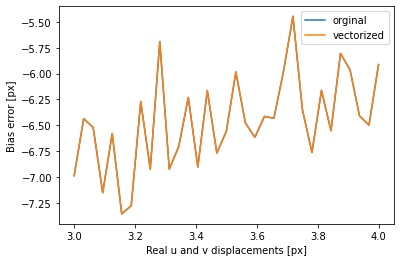

In [43]:
fig, ax = plt.subplots()
ax.set_ylabel('Bias error [px]')
ax.set_xlabel('Real u and v displacements [px]')
ax.plot(np.mgrid[3:4+n:n], bias_error_original)
ax.plot(np.mgrid[3:4+n:n], bias_error_vectorized)
ax.legend(
    ['orginal', 'vectorized'],
    loc = 'upper right'
)